In [1]:
# Preparation module
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model
from sklearn.datasets import load_boston

# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading dataset
boston = datasets.load_boston()

# Tranform independent variables into DataFrame
data = DataFrame(boston.data, columns = boston.feature_names)

# Insert dependent variable into DataFrame
data['MEDV'] = np.array(boston.target)

# Display five of front line
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
# L1&L2(Elesticnet)
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(normalize=True, selection='random')
model = linear_model.ElasticNet()
print(model)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [4]:
# Estimate Parameter
model.fit(boston.data,boston.target)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [5]:
# print coefficient and intercept
print(model.coef_)
print(model.intercept_)

[-0.08037077  0.05323951 -0.0126571   0.         -0.          0.93393555
  0.0205792  -0.76204391  0.30156906 -0.01643916 -0.7480458   0.00833878
 -0.75842612]
42.22956397215435


In [6]:
# preparation of data set
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target, name="PRICE")
X.dtypes
X.info()
X.describe()
X.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64

In [7]:
# Preparation of train, test data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=0)

In [8]:
# Estimate parameter in train data
model.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [9]:
# Forecasting(Train, Test Model)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

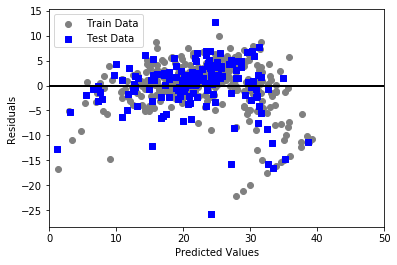

In [10]:
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'gray', marker = 'o', label = 'Train Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'blue', marker = 's', label = 'Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'black')
plt.xlim([0, 50])
plt.show()

In [11]:
# Regression Evaluation Measures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Print Mean Squared error
print('MSE Train : %.3f, Test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

# Print Mean Absolute error
print('MAE Train : %.3f, Test : %.3f' % (mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)))

# Print R-square
print('R^2 Train : %.3f, Test : %.3f' % (model.score(X_train, y_train), model.score(X_test, y_test)))

MSE Train : 24.381, Test : 31.874
MAE Train : 3.455, Test : 3.809
R^2 Train : 0.712, Test : 0.617


In [11]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
crossvalidation = KFold(n_splits=10, shuffle=True,
                    random_state=1)
scores = cross_val_score(model, X, y,
                         scoring='neg_mean_squared_error', 
cv=crossvalidation, n_jobs=1)
print('Folds: %i, mean squared error: %.2f std: %.2f' %
     (len(scores), np.mean(np.abs(scores)), np.std(scores)))

Folds: 10, mean squared error: 28.35 std: 11.48


target    AxesSubplot(0.1,0.15;0.8x0.75)
dtype: object

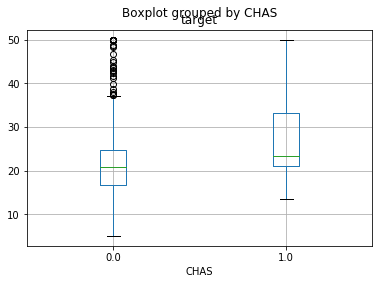

In [12]:
%matplotlib inline
import pandas as pd
df = pd.DataFrame(X, columns=boston.feature_names)
df['target'] = y
df.boxplot('target', by='CHAS', return_type='axes')